<a href="https://colab.research.google.com/github/saishdesai23/Spaceship_Titanic/blob/main/Spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Passenger Transfer to Alternate Dimension

## __Author__ - Saish Desai

## The task for this project is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

## 1. Importing libraries

In [565]:
import pandas as pd
import numpy as np

# Data vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('drive')

# Data modelling libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


## 2. Data Import

In [566]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [567]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## 3. Data understanding

In [568]:
# shape of train_data
print("shape of train_data")
print(train_data.shape)

# train_data information
print("shape of train_data")
print(train_data.info())

# describing numerical values of train_data
print(train_data.describe())

shape of train_data
(8693, 14)
shape of train_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
               Age   RoomService  ...           Spa        VRDeck
count  8514.000000  

4 .Data Vizualisation and Cleaning

In [569]:
# Updating the id in integer format
train_data['PassengerId'] = train_data['PassengerId'].apply(lambda x: x[:4] +x[5:] )
# len(set(train_data['PassengerId'])) checking whether the passengerid is still unique
# train_data.head()

# Applying the same tranformations to test data
# Updating the id in integer format
test_data['PassengerId'] = test_data['PassengerId'].apply(lambda x: x[:4] +x[5:] )
# len(set(train_data['PassengerId'])) checking whether the passengerid is still unique
# test_data.head()

Let us categorize the 'HomePlanet' and 'Destination' column using one hot encoding and replace the missing values of the HomePlanet encoding columns with probabilities of orgin with respect to each planet.

In [570]:
def catencoding(dataframe,catcol,index):
  """
  Function to encode categorical values and filling missing values with probility of occurence of each category from the dataset
  This function can be used variables with 3 categories
  """
  temp_dataframe = dataframe[catcol]
  catlist = list(dataframe.groupby(by=[catcol]).count()[index])
  P_cat1, P_cat2, P_cat3 = 0,0,0
  P_cat1 = round(catlist[0]/sum(catlist),2)
  P_cat2 = round(catlist[1]/sum(catlist),2)
  P_cat3 = round(catlist[2]/sum(catlist),2)
  print(P_cat1,P_cat2,P_cat3)
  dataframe = pd.get_dummies(dataframe, columns = [catcol])
  # listing all the dummy columns created
  dummy_col = list(dataframe.columns[-3:])
  # Replacing the missing values of the encoded columns with probabilities of orgin with respect to each column
  cat1 = []
  cat2 = []
  cat3 = []
  for ele1, ele2,ele3 in zip(dataframe[dummy_col[0]],dataframe[dummy_col[1]],dataframe[dummy_col[2]]):
    if ele1 == 0 and ele2 == 0 and ele3 == 0:
      cat1.append(P_cat1)
      cat2.append(P_cat2)
      cat3.append(P_cat3)
    if ele1 == 1 and ele2 == 0 and ele3 == 0:
      cat1.append(1)
      cat2.append(0)
      cat3.append(0)
    if ele1 == 0 and ele2 == 1 and ele3 == 0:
      cat1.append(0)
      cat2.append(1)
      cat3.append(0)
    if ele1 == 0 and ele2 == 0 and ele3 == 1:
      cat1.append(0)
      cat2.append(0)
      cat3.append(1)

  dataframe[dummy_col[0]] = cat1
  dataframe[dummy_col[1]] = cat2
  dataframe[dummy_col[2]] = cat3
  dataframe[catcol] = temp_dataframe
  return dataframe


In [571]:
# Encoding the categorical variables using the catencoding functions
train_data = catencoding(train_data,'HomePlanet','PassengerId')
train_data = catencoding(train_data,'Destination','PassengerId')

# Applying the same encoding to test data
test_data = catencoding(test_data,'HomePlanet','PassengerId')
test_data = catencoding(test_data,'Destination','PassengerId')

0.54 0.25 0.21
0.21 0.09 0.69
0.54 0.24 0.22
0.2 0.09 0.71


In [540]:
# https://u.osu.edu/missingdata/mechanisms-of-missingness/ -types of missing values
train_data.head(60)
train_data.to_csv("data.csv")
test_data.to_csv("data_test.csv")

Now let us consider the column 'CryoSleep' sleep. It has around 217 blank entries. It is a boolean entry so we will have either a true or a false value associated with it.Here, we observe that passengers with 0 expenditure on RoomService, FoodCourt, Shopping, Spa and VRDeck are in cryo sleep. For others we can set the cryo sleep value to false. This is an example of missing values at Random (MAR) where the missing values depend on observation from other column (ref -https://u.osu.edu/missingdata/mechanisms-of-missingness/)

In [541]:
cryo = train_data.groupby(by = ['CryoSleep']).sum()
cryo

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
CryoSleep,,,,,,,,,,,,,
False,158427.0,1865582.0,3799600.0,1443579.0,2588931.0,2530810.0,1789,3172.96,1193.00,1073.04,1044.30,405.70,3987.70
True,80983.0,0.0,0.0,0.0,0.0,0.0,2483,1422.50,929.75,684.75,749.08,387.32,1900.12


In [542]:
# https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas
train_data[train_data['CryoSleep'].isnull()]
Sleep = []
count=0
# Setting the cryosleep variable to True for passengers with 0 expenditure and setting False for the rest. Consideringonly empty entries
for i in range(len(train_data['CryoSleep'])):
  if str(train_data.loc[i,'CryoSleep']) == "nan":
    if train_data.loc[i,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum() == 0:
      count+=1
      train_data.loc[i,'CryoSleep'] = True
    else:
      count+=1
      train_data.loc[i,'CryoSleep'] = False
for i in range(len(train_data['CryoSleep'])):
  if train_data.loc[i,'CryoSleep'] == True:
    train_data.loc[i,['RoomService']] = 0
    train_data.loc[i,['FoodCourt']] = 0
    train_data.loc[i,['ShoppingMall']] = 0 
    train_data.loc[i,['Spa']] = 0
    train_data.loc[i,['VRDeck']] = 0
print(count)
train_data.to_csv("data.csv")

# Applying the same transformation to test data
test_data[test_data['CryoSleep'].isnull()]
Sleep = []
count=0
# Setting the cryosleep variable to True for passengers with 0 expenditure and setting False for the rest. Consideringonly empty entries
for i in range(len(test_data['CryoSleep'])):
  if str(test_data.loc[i,'CryoSleep']) == "nan":
    if test_data.loc[i,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum() == 0:
      count+=1
      test_data.loc[i,'CryoSleep'] = True
    else:
      count+=1
      test_data.loc[i,'CryoSleep'] = False
for i in range(len(test_data['CryoSleep'])):
  if test_data.loc[i,'CryoSleep'] == True:
    test_data.loc[i,['RoomService']] = 0
    test_data.loc[i,['FoodCourt']] = 0
    test_data.loc[i,['ShoppingMall']] = 0 
    test_data.loc[i,['Spa']] = 0
    test_data.loc[i,['VRDeck']] = 0
print(count)
test_data.to_csv("data_test.csv")



217
93


In [543]:
# Checking null entries for the column "CryoSleep" in the training data
print(train_data[train_data['CryoSleep'].isnull()])

# Checking null entries for the column "CryoSleep" in the test data
print(test_data[test_data['CryoSleep'].isnull()])


Empty DataFrame
Columns: [PassengerId, CryoSleep, Cabin, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, HomePlanet, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, Destination]
Index: []
Empty DataFrame
Columns: [PassengerId, CryoSleep, Cabin, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, HomePlanet, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, Destination]
Index: []


In [544]:
# https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
train_data["CryoSleep"] = train_data["CryoSleep"].astype(int)
test_data["CryoSleep"] = test_data["CryoSleep"].astype(int)

Here, the category of the column 'Cabin has been replaced with its depending join probability ranking with respect to Target column.\

We can neglect the the last element in the Cabin column, which mentions the side of the cabin. Since both the categories "P" and "S" are equally possible for the training dataset, we can.\

We can use this same join probability ranking for the test data set

In [545]:
# Lets encode categorization for the column "Cabin"
train_data["Side"] = train_data['Cabin'].apply(lambda x: str(x)[-1])
# train_data["Side"] = train_data["Side"].astype(int)
set(train_data["Side"])

# Reference - targeted/guided encoding
train_data['Cabin'] = train_data['Cabin'].astype(str).str[0]

#Categorizing cabins and assingning them weightage based on mean transportation rate for passengers in each category
print(train_data.groupby(['Cabin'])['Transported'].mean())

# Ranking the categories based on the weightage assigned to them
Encoded_Lables = train_data.groupby(['Cabin'])['Transported'].mean().sort_values().index
print(Encoded_Lables)
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables, 0) }
print(Encoded_Lables_Ranks)
train_data['Cabin_Encoded'] = train_data['Cabin'].map(Encoded_Lables_Ranks)


# Applying the same transformation to test data
# Lets encode categorization for the column "Cabin"
test_data["Side"] = test_data['Cabin'].apply(lambda x: str(x)[-1])
# train_data["Side"] = train_data["Side"].astype(int)
set(test_data["Side"])

# Reference - targeted/guided encoding
test_data['Cabin'] = test_data['Cabin'].astype(str).str[0]

# Finding categories of cabin in the test dataset
set(test_data['Cabin'])

# Uisng the ranking from the train data to categorize the cabins in test data
test_data['Cabin_Encoded'] = test_data['Cabin'].map(Encoded_Lables_Ranks)
test_data.head()

Cabin
A    0.496094
B    0.734275
C    0.680054
D    0.433054
E    0.357306
F    0.439871
G    0.516217
T    0.200000
n    0.502513
Name: Transported, dtype: float64
Index(['T', 'E', 'D', 'F', 'A', 'n', 'G', 'C', 'B'], dtype='object', name='Cabin')
{'T': 0, 'E': 1, 'D': 2, 'F': 3, 'A': 4, 'n': 5, 'G': 6, 'C': 7, 'B': 8}


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination,Side,Cabin_Encoded
0,001301,1,G,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,6
1,001801,0,F,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,3
2,001901,1,C,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1.0,0.0,Europa,1.0,0.0,0.0,55 Cancri e,S,7
3,002101,0,C,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.0,1.0,0.0,Europa,0.0,0.0,1.0,TRAPPIST-1e,S,7
4,002301,0,F,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,3


In the "VIP" column we observe that a large amount of values are labled as False. Which means that most of the passengers belong to non-VIP section. So, here we will encode the value by maping the True and False labels to counts of the respective classes.Assuming the missing values as Missing Completely at Randome (MCAR), there is no dependence of this column or any other predictor. Thus, we can replace values with count of the class in majority. In this case it is the non-VIP class.

In [546]:
VIP_Dict = train_data['VIP'].value_counts()
train_data['Encoded_VIP'] = train_data['VIP'].map(VIP_Dict)
train_data['Encoded_VIP'] = train_data['Encoded_VIP'].apply(lambda x: x/(VIP_Dict[0]+VIP_Dict[1]))
train_data['Encoded_VIP'].fillna(VIP_Dict[0]/(VIP_Dict[0]+VIP_Dict[1]), inplace = True)
print(train_data.head())

# Applying the same transformation for test data
VIP_Dict_test = test_data['VIP'].value_counts()
test_data['Encoded_VIP'] = test_data['VIP'].map(VIP_Dict_test)
test_data['Encoded_VIP'] = test_data['Encoded_VIP'].apply(lambda x: x/(VIP_Dict_test[0]+VIP_Dict_test[1]))
test_data['Encoded_VIP'].fillna(VIP_Dict_test[0]/(VIP_Dict_test[0]+VIP_Dict_test[1]), inplace = True)
test_data.head()

  PassengerId  CryoSleep Cabin  ...  Side Cabin_Encoded  Encoded_VIP
0      000101          0     B  ...     P             8     0.976561
1      000201          0     F  ...     S             3     0.976561
2      000301          0     A  ...     S             4     0.023439
3      000302          0     A  ...     S             4     0.976561
4      000401          0     F  ...     S             3     0.976561

[5 rows x 23 columns]


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination,Side,Cabin_Encoded,Encoded_VIP
0,001301,1,G,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,6,0.982314
1,001801,0,F,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,3,0.982314
2,001901,1,C,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1.0,0.0,Europa,1.0,0.0,0.0,55 Cancri e,S,7,0.982314
3,002101,0,C,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.0,1.0,0.0,Europa,0.0,0.0,1.0,TRAPPIST-1e,S,7,0.982314
4,002301,0,F,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1.0,0.0,0.0,Earth,0.0,0.0,1.0,TRAPPIST-1e,S,3,0.982314


Since we have a lot of missing values in the Age column, we need to fill/impute these values with mean, median or mode.
To check the distributionwe plot the box and distribution plot from the seaborn library

In [547]:
print("The mean age is: ",train_data['Age'].mean())
print("The median age is: ", train_data['Age'].median())
print("The mode age is: ", train_data['Age'].mode())

The mean age is:  28.82793046746535
The median age is:  27.0
The mode age is:  0    24.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


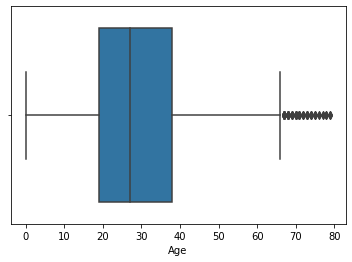

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


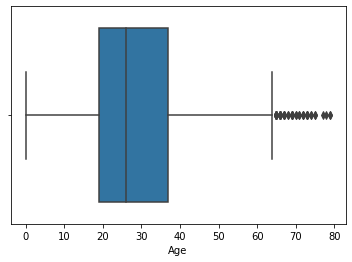

In [548]:
# https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
# Boxplot for age distribution
sns.boxplot(train_data.Age)
plt.show()
sns.boxplot(test_data.Age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


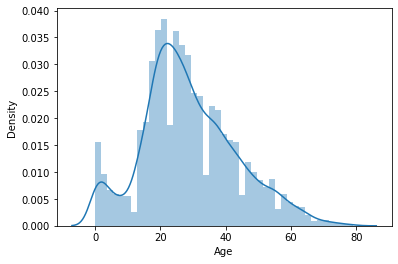

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


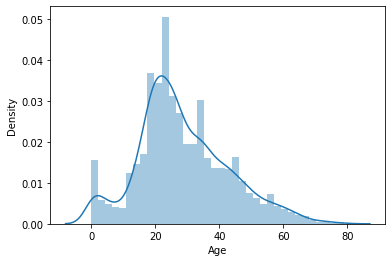

In [549]:
# Distribution plot for age distribution
sns.distplot(train_data.Age)
plt.show()
sns.distplot(test_data.Age)
plt.show()

We conclude that the data is right-skewed, with a moderately large amount of outliers. So we choose the median for imputing missing values.\

We can apply the same tranformation to test data since the test data is also skewed


In [550]:
# Replacing the null values with median of the Age
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data.to_csv("data.csv")
# confirmation of removal of all the null values in data
print(train_data[train_data['Age'].isna()])

# Applying the same transformation to test data
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
# confirmation of removal of all the null values in data
print(test_data[test_data['Age'].isna()])


Empty DataFrame
Columns: [PassengerId, CryoSleep, Cabin, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, HomePlanet, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, Destination, Side, Cabin_Encoded, Encoded_VIP]
Index: []
Empty DataFrame
Columns: [PassengerId, CryoSleep, Cabin, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, HomePlanet, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, Destination, Side, Cabin_Encoded, Encoded_VIP]
Index: []


In [551]:
# selecting relevant columns
train_data_clean = train_data.drop(columns = ['Cabin','VIP','Name', 'HomePlanet','Destination','Side'])
print(train_data_clean.head())

#selecting the relevant columns from test data
test_data_clean = test_data.drop(columns = ['Cabin','VIP','Name', 'HomePlanet','Destination','Side'])
print(test_data_clean.head())

  PassengerId  CryoSleep  ...  Cabin_Encoded  Encoded_VIP
0      000101          0  ...              8     0.976561
1      000201          0  ...              3     0.976561
2      000301          0  ...              4     0.023439
3      000302          0  ...              4     0.976561
4      000401          0  ...              3     0.976561

[5 rows x 17 columns]
  PassengerId  CryoSleep  ...  Cabin_Encoded  Encoded_VIP
0      001301          1  ...              6     0.982314
1      001801          0  ...              3     0.982314
2      001901          1  ...              7     0.982314
3      002101          0  ...              7     0.982314
4      002301          0  ...              3     0.982314

[5 rows x 16 columns]


Let us plot a distibution plot for the numerical variables -  'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


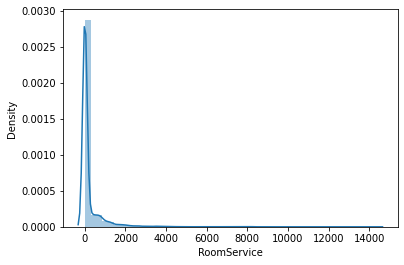

Mean:  222.90687645687646
Median:  0.0
Mode:  0.0
Amount of entries with 0 in  RoomService :  64.93730587829288


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


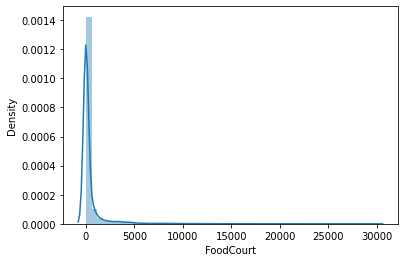

Mean:  454.28702948374314
Median:  0.0
Mode:  0.0
Amount of entries with 0 in  FoodCourt :  63.57989186701944


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


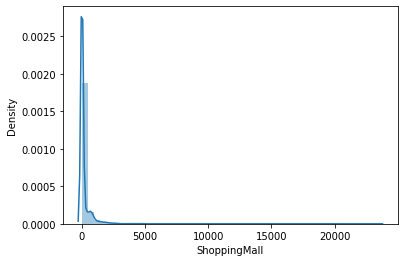

Mean:  171.7255358807083
Median:  0.0
Mode:  0.0
Amount of entries with 0 in  ShoppingMall :  65.40894972966755


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


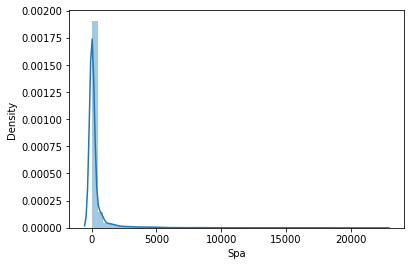

Mean:  308.7082896117524
Median:  0.0
Mode:  0.0
Amount of entries with 0 in  Spa :  62.015414701483955


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


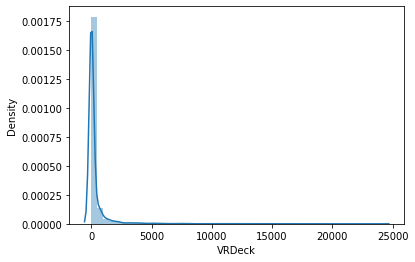

Mean:  302.47200186654226
Median:  0.0
Mode:  0.0
Amount of entries with 0 in  VRDeck :  63.98251466697343


In [552]:
num = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for ele in num:
  sns.distplot(train_data_clean[ele])
  plt.show()
  print("Mean: ", train_data_clean[ele].mean())
  print("Median: ", train_data_clean[ele].median())
  print("Mode: ", train_data_clean[ele].mode()[0])
  print("Amount of entries with 0 in ",ele,": ",len(train_data_clean[train_data_clean[ele] == 0])*100/len(train_data_clean))


From the distribution we can conclude that the data for the mentioned variables is right skewed. Around 60 to 65% values are 0.Thus, the median and mode are 0.

<Figure size 1440x720 with 0 Axes>

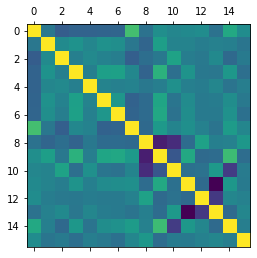

In [553]:
plt.figure(figsize = (20,10))
plt.matshow(train_data_clean.corr())
plt.show()

In [554]:
train_data_clean.corr()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Encoded,Encoded_VIP
CryoSleep,1.000000,-0.077806,-0.254601,-0.214717,-0.216569,-0.206891,-0.201213,0.467230,-0.111542,0.096781,0.033596,0.063310,0.086160,-0.110564,0.295360,0.081318
Age,-0.077806,1.000000,0.068965,0.128651,0.033466,0.121780,0.100428,-0.074233,-0.202745,0.218163,0.015867,0.017836,-0.027567,0.001573,-0.009287,-0.091863
RoomService,-0.254601,0.068965,1.000000,-0.014284,0.056270,0.011504,-0.018118,-0.244925,-0.141373,-0.068446,0.247069,-0.024752,-0.064004,0.062415,-0.175466,-0.057551
FoodCourt,-0.214717,0.128651,-0.014284,1.000000,-0.012577,0.222855,0.228942,0.044560,-0.215286,0.366460,-0.127684,0.135276,-0.066482,-0.077902,0.160207,-0.127694
ShoppingMall,-0.216569,0.033466,0.056270,-0.012577,1.000000,0.015402,-0.005888,0.007999,-0.071820,-0.022210,0.112058,-0.014185,-0.032136,0.032955,-0.094426,-0.019215
Spa,-0.206891,0.121780,0.011504,0.222855,0.015402,1.000000,0.154805,-0.221563,-0.159513,0.267373,-0.090081,0.076006,-0.053476,-0.033644,0.088794,-0.060831
VRDeck,-0.201213,0.100428,-0.018118,0.228942,-0.005888,0.154805,1.000000,-0.207657,-0.155526,0.284324,-0.113386,0.089796,-0.045894,-0.050542,0.119466,-0.124106
Transported,0.467230,-0.074233,-0.244925,0.044560,0.007999,-0.221563,-0.207657,1.000000,-0.170868,0.177838,0.019816,0.109068,0.000117,-0.096813,0.194161,0.037261
HomePlanet_Earth,-0.111542,-0.202745,-0.141373,-0.215286,-0.071820,-0.159513,-0.155526,-0.170868,1.000000,-0.629546,-0.555939,-0.154997,0.234759,-0.011000,0.000562,0.164210
HomePlanet_Europa,0.096781,0.218163,-0.068446,0.366460,-0.022210,0.267373,0.284324,0.177838,-0.629546,1.000000,-0.295841,0.292645,-0.165320,-0.154967,0.436494,-0.147755


The numberical vairables do not have any strong correlation so we can fill the null values for the all the columns with 0.

In [555]:
train_data_clean['RoomService'].fillna(0, inplace = True)
train_data_clean['FoodCourt'].fillna(0, inplace = True)
train_data_clean['ShoppingMall'].fillna(0, inplace = True)
train_data_clean['Spa'].fillna(0, inplace = True)
train_data_clean['VRDeck'].fillna(0, inplace = True)

# Applying the same transformation to test data as the test data also has similar distribution
test_data_clean['RoomService'].fillna(0, inplace = True)
test_data_clean['FoodCourt'].fillna(0, inplace = True)
test_data_clean['ShoppingMall'].fillna(0, inplace = True)
test_data_clean['Spa'].fillna(0, inplace = True)
test_data_clean['VRDeck'].fillna(0, inplace = True)

In [556]:
train_data_clean.to_csv("data.csv")
test_data_clean.to_csv("data_test.csv")

## 5. Model fitting
Let us start with using logistic regression

Splitting the data into train-test

In [557]:
Y = train_data_clean['Transported']
X = train_data_clean.drop(columns = ['Transported'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

Initializing the logistic regression model

In [558]:
lr = LogisticRegression()
lr

LogisticRegression()

Fitting the model and predicting the outcome

In [559]:
lr.fit(X_train, Y_train)
yhat_lr = lr.predict(X_test)
yhat_lr

array([False,  True,  True, ..., False, False,  True])

In [560]:
accuracy_score(Y_test,yhat_lr)

0.7682119205298014

In [561]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
yhat_nb = nb.predict(X_test)
yhat_nb
accuracy_score(Y_test,yhat_nb)

0.7350993377483444

In [562]:
ysub = lr.predict(test_data_clean)

In [563]:
test_data

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination,Side,Cabin_Encoded,Encoded_VIP
0,001301,1,G,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1.0,0.0,0.0,Earth,0.0,0.00,1.00,TRAPPIST-1e,S,6,0.982314
1,001801,0,F,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1.0,0.0,0.0,Earth,0.0,0.00,1.00,TRAPPIST-1e,S,3,0.982314
2,001901,1,C,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1.0,0.0,Europa,1.0,0.00,0.00,55 Cancri e,S,7,0.982314
3,002101,0,C,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.0,1.0,0.0,Europa,0.0,0.00,1.00,TRAPPIST-1e,S,7,0.982314
4,002301,0,F,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1.0,0.0,0.0,Earth,0.0,0.00,1.00,TRAPPIST-1e,S,3,0.982314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602,1,G,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1.0,0.0,0.0,Earth,0.0,0.00,1.00,TRAPPIST-1e,S,6,0.982314
4273,926901,0,n,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1.0,0.0,0.0,Earth,0.0,0.00,1.00,TRAPPIST-1e,n,5,0.982314
4274,927101,1,D,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,0.0,1.0,Mars,1.0,0.00,0.00,55 Cancri e,P,2,0.982314
4275,927301,0,D,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0.0,1.0,0.0,Europa,0.2,0.09,0.71,NaN,P,2,0.982314


In [564]:
test_ID = list(pd.read_csv("/content/test.csv")['PassengerId'])
submission = pd.DataFrame(zip(test_ID,ysub), columns = ['PassengerId','Transported']).set_index("PassengerId")
submission.to_csv("submission.csv")